In [ ]:
import sqlite3                    # To work with SQLite database
import pandas as pd               # For data manipulation and analysis
import matplotlib.pyplot as plt   # For plotting the bar chart


In [ ]:
# This will create a file named 'sales_data.db' if it doesn’t exist
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

In [ ]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL
);
""")
conn.commit()

In [ ]:
sample_data = [
    ('Laptop', 5, 60000),
    ('Headphones', 10, 1500),
    ('Keyboard', 7, 1200),
    ('Mouse', 12, 800),
    ('Monitor', 3, 12000),
    ('Laptop', 2, 60000),
    ('Mouse', 4, 800),
    ('Keyboard', 5, 1200)
]

# Optional: Insert data only if table is empty
cursor.execute("SELECT COUNT(*) FROM sales;")
if cursor.fetchone()[0] == 0:
    cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?);", sample_data)
    conn.commit()

In [ ]:
query = """
SELECT
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
ORDER BY total_revenue DESC;
"""

In [ ]:
query

'\nSELECT \n    product, \n    SUM(quantity) AS total_quantity, \n    SUM(quantity * price) AS total_revenue\nFROM sales\nGROUP BY product\nORDER BY total_revenue DESC;\n'

In [ ]:
df = pd.read_sql_query(query, conn)

In [ ]:
print("🧾 Basic Sales Summary Report:\n")
print(df)

🧾 Basic Sales Summary Report:

      product  total_quantity  total_revenue
0      Laptop               7       420000.0
1     Monitor               3        36000.0
2  Headphones              10        15000.0
3    Keyboard              12        14400.0
4       Mouse              16        12800.0


/tmp/ipython-input-10-700465253.py:13: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Fix spacing
/tmp/ipython-input-10-700465253.py:16: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.savefig("sales_revenue_chart.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


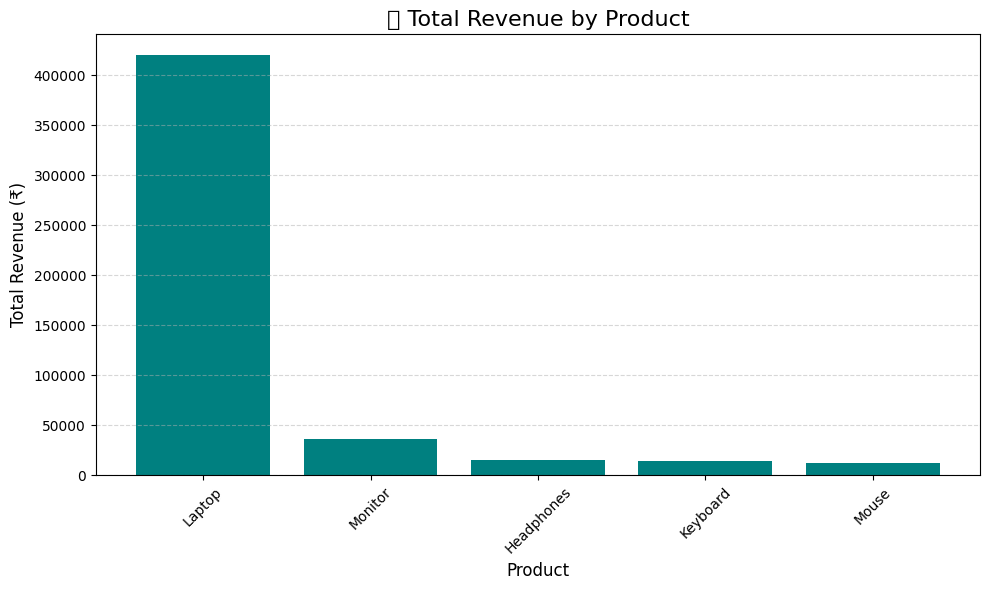

In [ ]:
# ------------------------------------------------------
plt.figure(figsize=(10,6))  # Set the figure size
plt.bar(df['product'], df['total_revenue'], color='teal')  # Bar chart

# Add chart labels and title
plt.title("💸 Total Revenue by Product", fontsize=16)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Total Revenue (₹)", fontsize=12)

# Optional visual enhancements
plt.xticks(rotation=45)  # Rotate product names
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()  # Fix spacing

# Save chart as image file
plt.savefig("sales_revenue_chart.png")

# Show chart
plt.show()

# ------------------------------------------------------
# STEP 9: CLOSE DATABASE CONNECTION
# ------------------------------------------------------
conn.close()